# $$Gradient Descent$$
$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [25]:
import numpy as np
import matplotlib.pyplot as plt

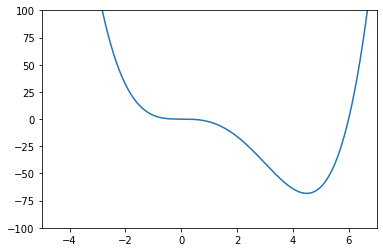

In [26]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [27]:
x = 5
x_old = -2 # initial
eps = 0.01
precision = 0.000001 

# 도함수 (미분)
def fp(x):
    return 2*(x**3)-9*(x**2)

In [28]:
# 경사하강법
while (abs(x - x_old)>precision):
    x_old = x
    x = x_old - eps*fp(x_old)
print(f"함수의 최저점 x: {round(x,1)}")


함수의 최저점 x: 4.5



# $$Diabetes (regression)$$
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

## 직접 코딩

In [29]:
from sklearn import datasets

In [30]:
diabetes=datasets.load_diabetes()

In [31]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [32]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

No handles with labels found to put in legend.


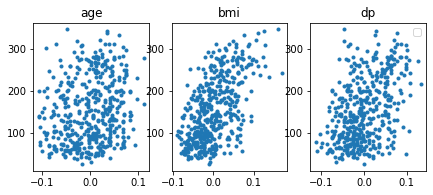

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(251)
plt.plot(X_age,Y,".")
plt.title("age")
plt.subplot(252)
plt.plot(X_bmi,Y,".")
plt.title("bmi")
plt.subplot(253)
plt.plot(X_p,Y,".")
plt.title("dp")
plt.legend()

In [34]:
def MSE(a,b,x,y):
    f=a*x+b
    return np.mean((f-y)**2)


In [35]:
a,b,c,d,e,f=1,1,1,1,1,1
eps=0.1

In [36]:
for i in range(100000):

    # age
    if MSE(a+eps,d,X_age,Y)>MSE(a-eps,b,X_age,Y):
        a-=eps
    else: a+=eps

    if MSE(a,b+eps,X_age,Y)>MSE(a,b-eps,X_age,Y):
        b-=eps
    else: b+=eps

    # bmi
    if MSE(c+eps,d,X_bmi,Y)>MSE(c-eps,d,X_bmi,Y):
        c-=eps
    else: c+=eps

    if MSE(c,d+eps,X_bmi,Y)>MSE(c,d-eps,X_bmi,Y):
        d-=eps
    else: d+=eps

    # bp
    if MSE(e+eps,f,X_p,Y)>MSE(e-eps,f,X_p,Y):
        e-=eps
    else: e+=eps

    if MSE(e,f+eps,X_p,Y)>MSE(e,f-eps,X_p,Y):
        f-=eps
    else: f+=eps

    

In [37]:
a,b,c,d,e,f
print(f' age\n기울기: {a} \n 절편: {b} \n ')
print(f' bmi\n기울기: {c} \n 절편: {d} \n ')
print(f' bp\n기울기: {e} \n 절편: {f} \n ')

 age
기울기: 304.20000000000067 
 절편: 152.19999999999564 
 
 bmi
기울기: 949.4000000001473 
 절편: 152.19999999999564 
 
 bp
기울기: 714.800000000094 
 절편: 152.19999999999564 
 


## sklearn을 이용하여 계산

In [38]:

from sklearn.linear_model import LinearRegression

In [39]:
L=[X_age,X_bmi,X_p]
l=['age','bmi','bp']
for j,i in enumerate(L):
    f= LinearRegression()
    f.fit(i.reshape(-1,1),Y)
    print(f' {l[j]}\n기울기: {f.coef_[0]} \n 절편: {f.intercept_} \n ')

 age
기울기: 304.18307452829475 
 절편: 152.13348416289605 
 
 bmi
기울기: 949.4352603839491 
 절편: 152.1334841628967 
 
 bp
기울기: 714.7416437042881 
 절편: 152.13348416289585 
 


No handles with labels found to put in legend.


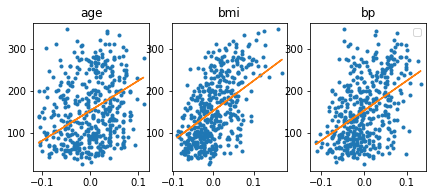

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(251)
plt.plot(X_age,Y,".")
plt.plot(X_age,f.predict(X_age.reshape(-1,1)))
plt.title("age")
plt.subplot(252)
plt.plot(X_bmi,Y,".")
plt.plot(X_bmi,f.predict(X_bmi.reshape(-1,1)))
plt.title("bmi")
plt.subplot(253)
plt.plot(X_p,Y,".")
plt.plot(X_p,f.predict(X_p.reshape(-1,1)))
plt.title("bp")
plt.legend()